<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 9. Основы поискового анализа данных (EDA) </h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие № 9. Основы поискового анализа данных (EDA)</b>

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

## Исследовательский анализ данных (Exploratory Data Analysis - EDA)

#### Скорее, сочетание философии с методологей
* как мы "разбираемся" с данными
* на что в данных мы смотрим
* как мы смотрим
* как интерпретируем увиденное
* не смотря на общие методы, каждый DA вырабатывает свой "стиль"

#### Обычный порядок действий
* получить и ввести датасет
* понять, какая информация содержится в датасете ("семантика")
* понять структуру данных ("синтаксис")
* что делать с пропусками (если они  есть)
* извлечь существенные переменные
* выявить выбросы и аномалии
* сделать и проверить каки-либо предположения о данных
* определить факторное пространство (что на что и как влияет)
* выполнить отчет (если он нужен)

#### Используеются
* графические средства
* отчеты и статистика
* преобразования даннных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from numpy.random import randn
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
import os
import os.path

## Загрузите данные с kaggle

### https://www.kaggle.com/c/house-prices-advanced-regression-techniques

* какие данные у нас есть?
* есть ли у нас описание?
* что от нас требуется?

нам нужны тренировочные и тестовые данные: 
* __train.csv__
* __test.csv__

In [8]:
data_dir = os.path.join("..", "datasets", "House Prices Advanced Regression Techniques")
train = pd.read_csv( os.path.join( "train.csv"))
test = pd.read_csv( os.path.join("test.csv"))

In [9]:
train.shape

(1460, 81)

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [13]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## <font color=red>ЗАДАНИЕ</font>

Разделите датафрейм на 2. 
* Создайте копию исходго датафрейма (__для чего?__)
* В первом __X_train__  - должны остаться все переменные, кроме целевой. 
* Во втором __y_train__ - только целевая переменная.


In [18]:
# Ваш код
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice'].copy()

In [19]:
X_train.shape, y_train.shape

((1460, 80), (1460,))

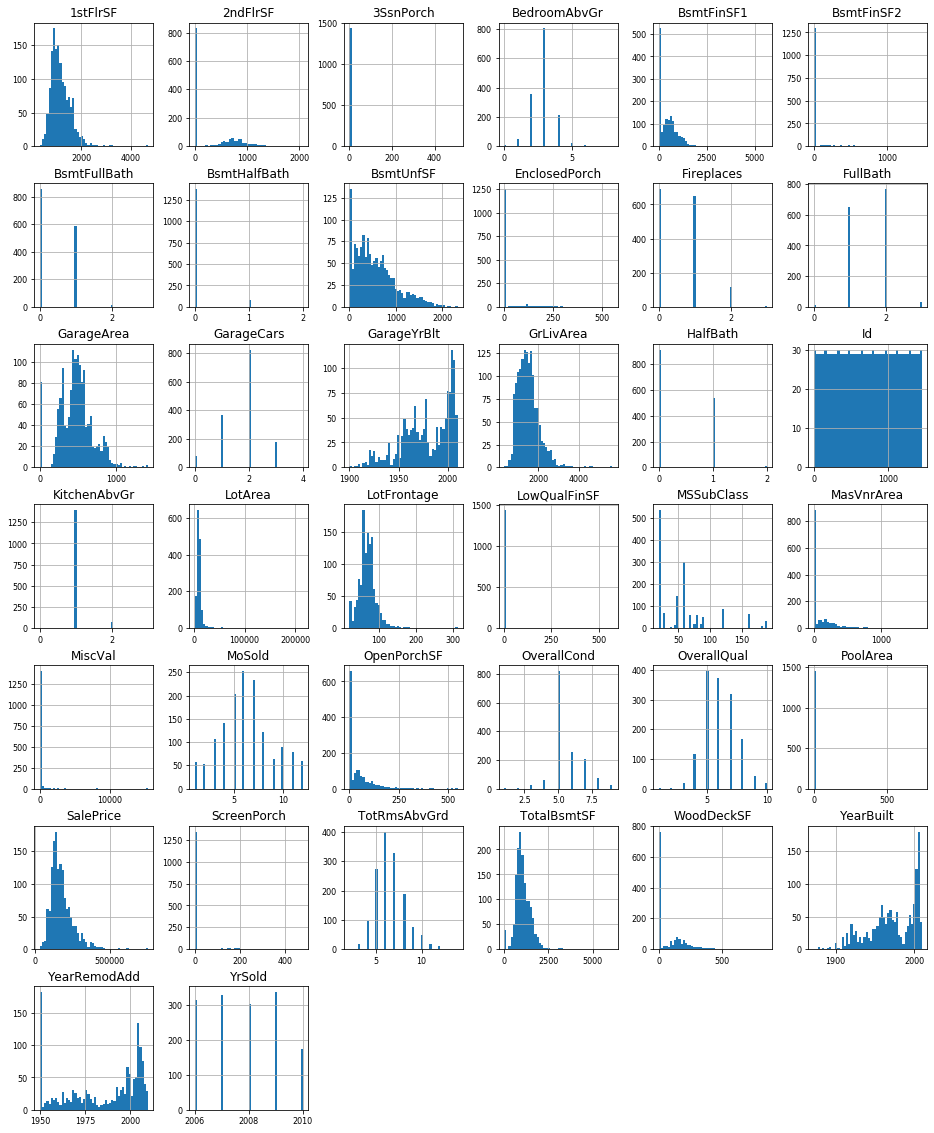

In [20]:
train.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

#### * Какие графики наиболее подозрительны на выбросы и почему?
#### * Постройте графики для каждой из них 

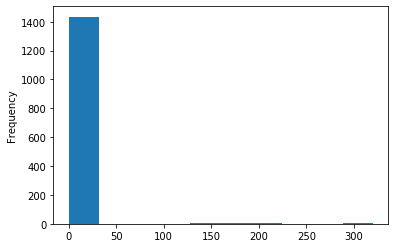

In [61]:
# Ваш код
# plt.plot(train['3SsnPorch'])
train[train['3SsnPorch'] < 400]['3SsnPorch'].plot.hist()

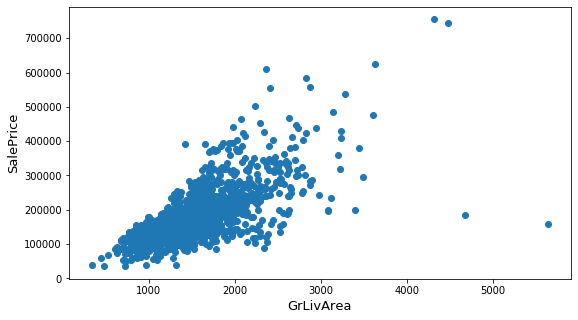

In [57]:
fig, ax = plt.subplots( figsize=(9,5))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show();

### <font color=green>ВОПРОСЫ</font>
* Где здесь выбросы?
* Что с ними можно сделать

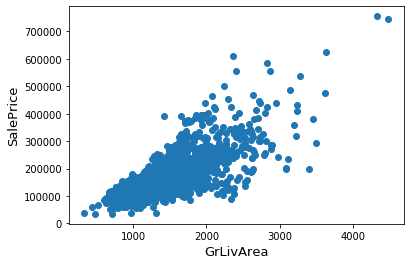

In [59]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


### <font color=green>ВОПРОС.</font> Остались ли ещё выбросы?

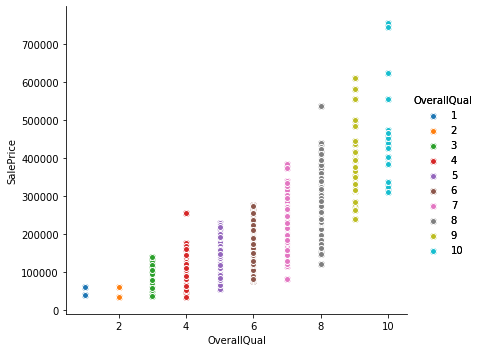

In [62]:
# Modify the graph above by assigning each species an individual color.
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
g=sns.FacetGrid(train[columns], hue="OverallQual", height=5) \
   .map(plt.scatter, "OverallQual", "SalePrice") \
   .add_legend()
g=g.map(plt.scatter, "OverallQual", "SalePrice",edgecolor="w").add_legend();
plt.show()

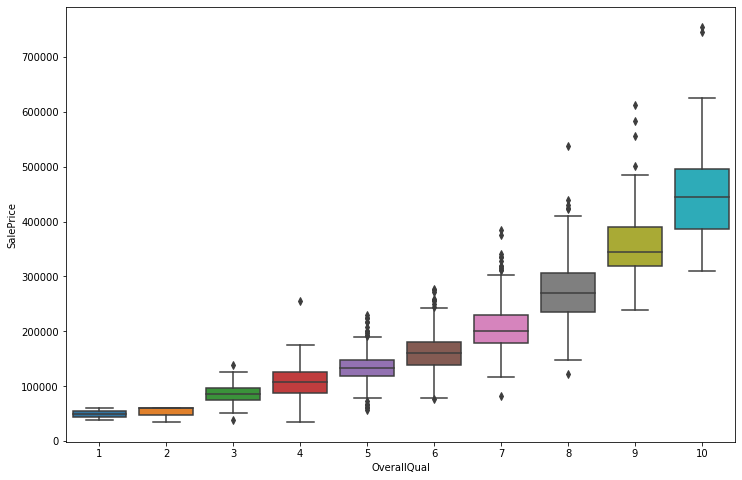

In [63]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)


 mu = 180932.92 and sigma = 79467.79



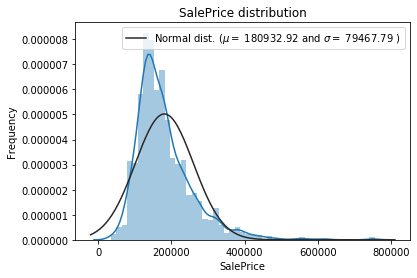

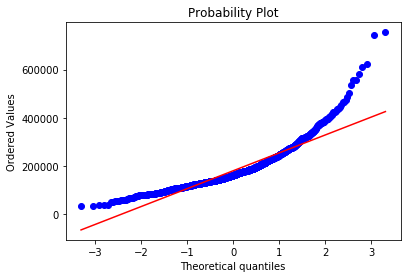

In [64]:
sns.distplot(train['SalePrice'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### <font color=green>ВОПРОС.</font>  Что можно сделать с этим? Остались ли ещё выбросы?

In [65]:
# Что сделано здесь?
train["SalePrice"] = np.log1p(train["SalePrice"])  # Логарифмируем чтобы привести синий график к прямой т.к. он похож на экспоненту


 mu = 12.02 and sigma = 0.40



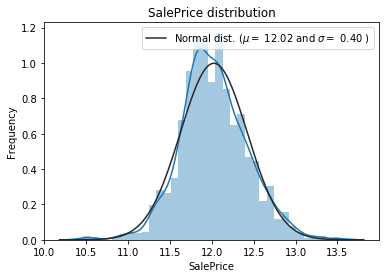

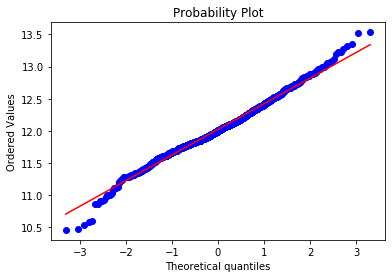

In [66]:
#Check the new distribution 
sns.distplot(train['SalePrice'], fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### <font color=green>ВОПРОС.</font> 
* Появились ли у нас новые кандидаты на выбросы? Обоснуйте.
* Как вернуться к исходным данным? 
* Надо ли возвращаться к ним в данном случае?

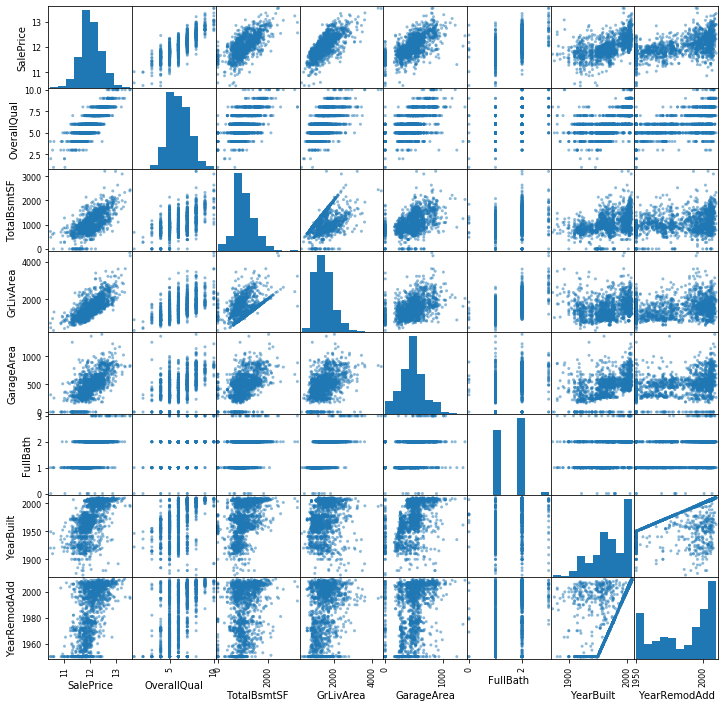

<Figure size 432x288 with 0 Axes>

In [68]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
# взаимные зависимости данных
pd.plotting.scatter_matrix(train[columns],figsize=(12,12));
plt.figure();

## Очистка и подготовка данных

### Поиск пропущенных данных

In [70]:

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test), sort=True).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


#### <font color=green>ВОПРОС.</font>  Зачем мы это сделали?

## <font color=red>ЗАДАНИЕ</font>
* Присвойте значения массивов X_train и X_test так, чтобы они соответствовали "прежним" массивам

In [71]:
# Ваш код



### Пропущенные данные

#### <font color=green>ВОПРОС.</font>  
* Какие данные имеют пропуски? Составьте список.
* Чем мы будем их заполнять?

In [73]:
# создаем доп серию с количество определенных данных/ колич неопределенных днанных
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

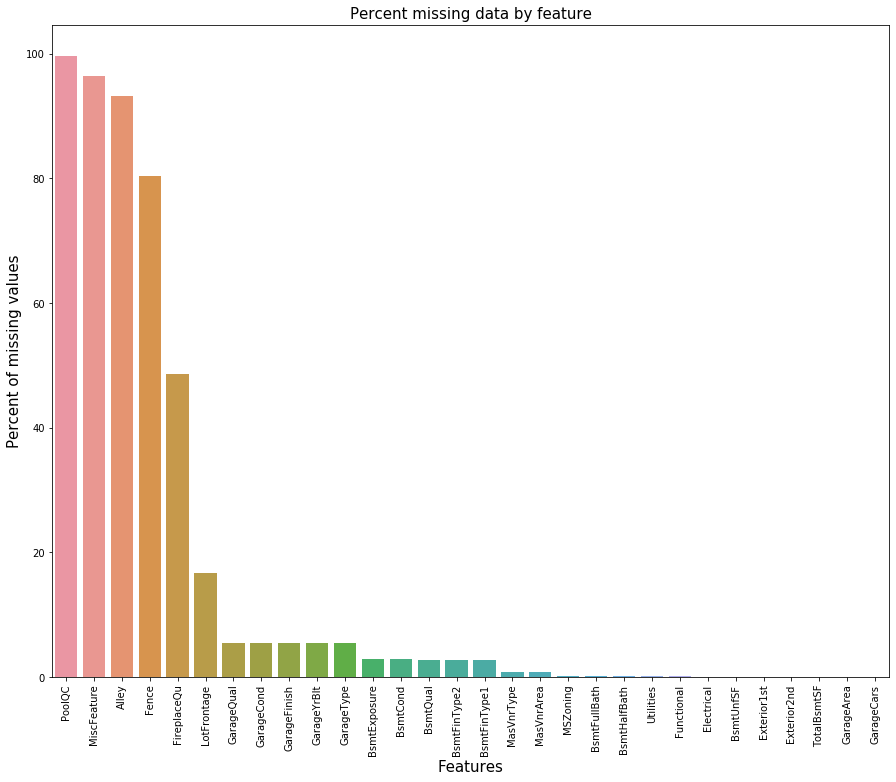

In [74]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

#### <font color=green>ВОПРОС.</font>  Являются ли значения PoolQC и MiscFeature выбросами?

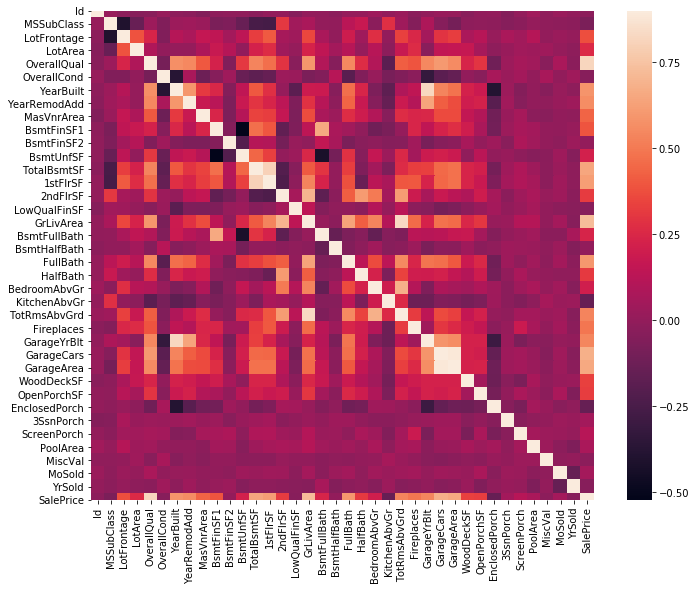

In [75]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#### Более удобочитаемый вариант 

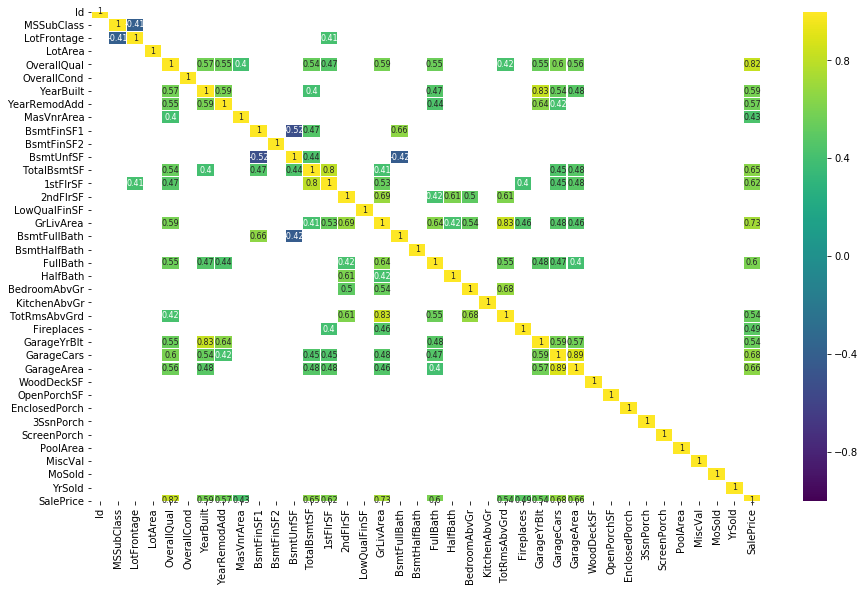

In [76]:
plt.subplots(figsize=(15,9))
sns.heatmap(corrmat[(corrmat >= 0.4) | (corrmat < -0.4)], 
            cmap='viridis',
            vmax=1.0, vmin=-1.0,
            linewidth=0.1,
            annot=True,
            annot_kws={"size":8});

### Фильтрация пропущенных данных

In [77]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [78]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [79]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [80]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [81]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [82]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [83]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [84]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [85]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [86]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [87]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [90]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])  
# категориальные значения заполняются не медианой а модой

#### <font color=green>ВОПРОС.</font>  Почему? Что делает mode()?  - наиболее встречающееся значение

In [91]:
all_data = all_data.drop(['Utilities'], axis=1)

#### <font color=green>ВОПРОС.</font>  Почему?

In [92]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [93]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [94]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [95]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [96]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [97]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

### Проверяем, остались ли не заполненные данные?

In [100]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


#### <font color=green>ВОПРОС.</font>  Какие численные значения можно преобразовать в категориальные?

In [102]:
from sklearn.preprocessing import LabelEncoder

# опрееили катеогриальные колонки
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values))  # обучили encoder на всех значениях текущей колонки
    all_data[c] = lbl.transform(list(all_data[c].values))  # запустили encoder на эту колонку. Непрерывные данные - > категориальные

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 79)


#### <font color=green>ВОПРОС.</font>  Можно ли найти сложные / составные признаки?

In [103]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Признаки со смещенным распределением

In [105]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})  # skew - степнь смещенности
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [107]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# исправляем распределение
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 60 skewed numerical features to Box Cox transform


In [108]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 221)


In [109]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       ...
       'SaleCondition_Partial', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=221)

In [110]:
train = all_data[:ntrain]
test = all_data[ntrain:]

### Рекомендуется посмотреть

https://www.kaggle.com/mjbahmani/machine-learning-workflow-for-house-prices

## <font color="blue">Практическое задание</font>

 www.kaggle.com/c/titanic

Выполните EDA <b>по приведенному ранее образцу</b> для данного датасета. Перед каждой ячейкой должен быть комментарий в строке типа Makrdown, 
говорящей, что выполняется и почему.

## Экзаменационные вопросы:

* EDA, её назначение и типовая структура